In [51]:
# Imporing pandas, numpy, seaborn and mathplot libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [52]:
# 3.2 Regression Task
df = pd.read_csv("/content/drive/MyDrive/3rd SEM/AI/Final_CourseWork/Shoe prices(Regression).csv")

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# 3.2(1)
# Display Columns
print(df.columns)

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')


In [55]:
# check for null values
print(df.isnull().sum())

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64


In [56]:
print(df.describe())

       Brand   Model     Type Gender    Size  Color Material Price (USD)
count   1006    1006     1006   1006    1006   1006     1006        1006
unique    10     239       18      2      13     82       34          33
top     Nike  Sk8-Hi  Running    Men  US 8.5  Black     Mesh     $65.00 
freq     118      39      332    535     132    178      308         121


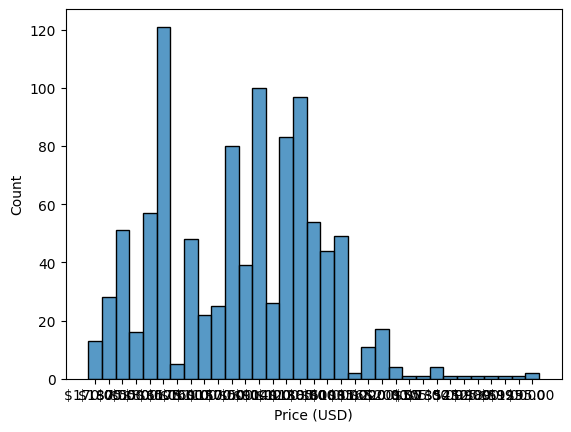

In [57]:
# Data analysis of Shoe Price dataset.
sns.histplot(df['Price (USD)'])
plt.show()

In [58]:
# Duplicate Values Check
df.drop_duplicates(inplace=True)
print(df.describe())

              Brand   Model     Type Gender    Size  Color Material  \
count           925     925      925    925     925    925      925   
unique           10     239       18      2      13     82       34   
top     New Balance  NMD_R1  Running    Men  US 8.5  Black     Mesh   
freq             98      35      320    486     120    170      296   

       Price (USD)  
count          925  
unique          33  
top        $65.00   
freq           106  


In [59]:

df['Size'] = df['Size'].astype(str).str.replace("US ", "", regex=False)

# Convert to float
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Fill NaN values with the median
df['Size'] = df['Size'].fillna(df['Size'].median())


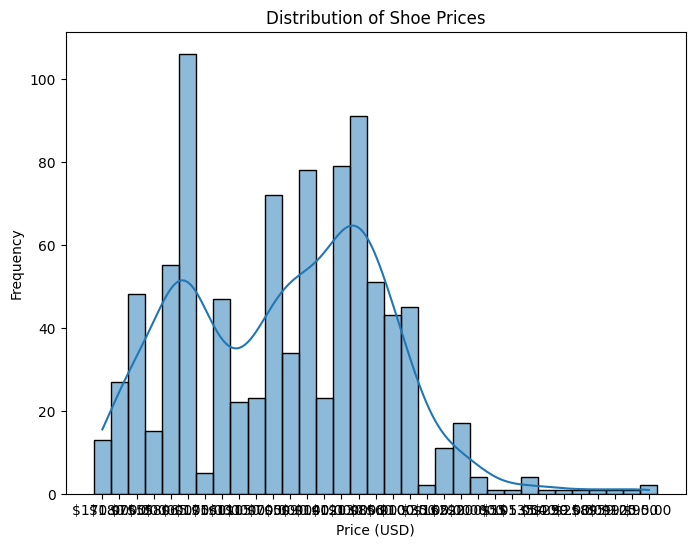

In [60]:
# Histogram Of Shoe Prices
plt.figure(figsize=(8, 6))
figsize = (10, 6)
sns.histplot(df['Price (USD)'], bins=20, kde=True)
plt.title('Distribution of Shoe Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

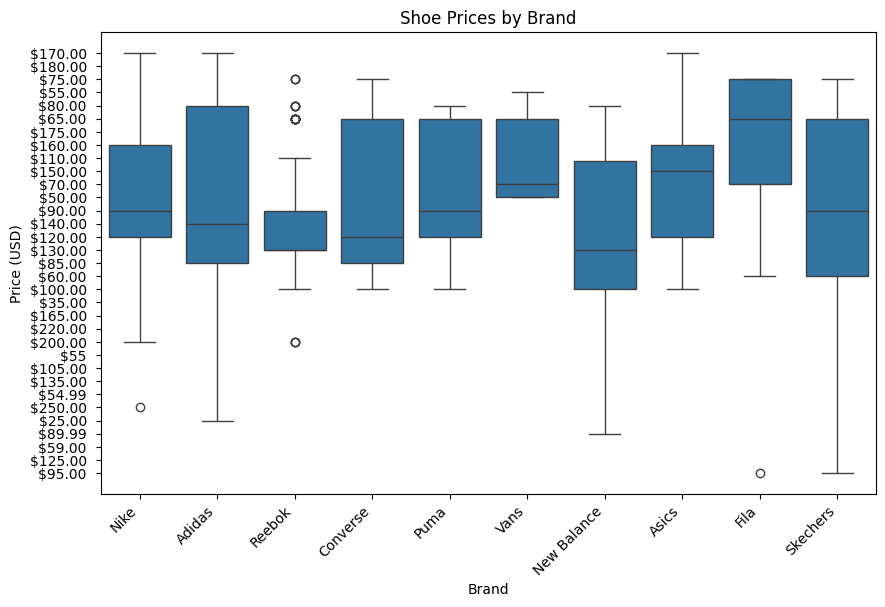

In [61]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price (USD)', data=df)
plt.title('Shoe Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

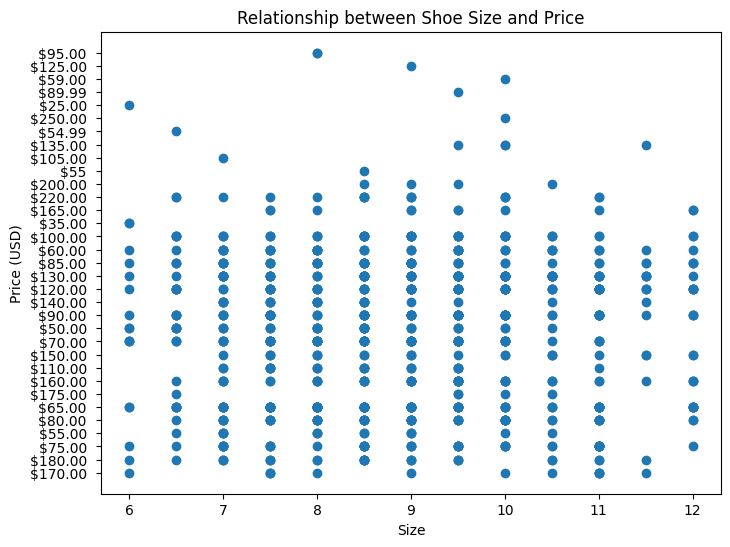

In [62]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Size'], df['Price (USD)'])
plt.title('Relationship between Shoe Size and Price')
plt.xlabel('Size')
plt.ylabel('Price (USD)')
plt.show()

In [63]:


# Check if 'Price (USD)' is already numeric
if not pd.api.types.is_numeric_dtype(df['Price (USD)']):
    # Remove the dollar sign and convert 'Price (USD)' to numeric if not already done
    df['Price (USD)'] = df['Price (USD)'].str.replace('$', '', regex=False).astype(float)

# Separate features and target variable
X = df.drop(columns=['Price (USD)'])
y = df['Price (USD)'].values.reshape(-1, 1)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Add a column of ones for the bias term
X_encoded = np.hstack((np.ones((X_encoded.shape[0], 1)), X_encoded.values))

# Split the df into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(len(indices) * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize parameters
num_features = X_train.shape[1]
weights = np.zeros((num_features, 1))
bias = 0

# Hyperparameters
learning_rate = 0.0001
num_iterations = 10000

# Cost function (Mean Squared Error)
def compute_cost(X, y, weights, bias):
    m = len(y)
    predictions = np.dot(X, weights) + bias
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = np.dot(X, weights) + bias

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)

        # Update weights and bias
        weights = weights - learning_rate * dw # Ensure both operands are numeric
        bias = bias - learning_rate * db # Ensure both operands are numeric

        # Compute cost
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)

        # if i % 1000 == 0:
        #     print(f'Iteration {i}: Cost {cost}')

    return weights, bias, cost_history

# Train the model
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Make predictions
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

y_pred = predict(X_test, weights, bias)

# Evaluate the model
def mean_squared_error(y_true, y_pred):
    m = len(y_true)
    mse = (1 / m) * np.sum((y_true - y_pred) ** 2)
    return mse

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1452.5175541590877
R-squared: 0.17041981676404916


In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")


Linear Regression - Mean Squared Error: 126.18642708682162
Linear Regression - R-squared: 0.9279308129496726


Model 2

In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 608842.886200641
R-squared: -346.73004405350775


In [66]:

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)


# Perform the hyperparameter optimization
random_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}


In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

param_dist_lr = {
    'fit_intercept': [True, False],

}

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Initialize RandomizedSearchCV for Linear Regression
random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_dist_lr,
    n_iter=2,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)

# Perform the hyperparameter optimization for Linear Regression
random_search_lr.fit(X_train, y_train.ravel())

# Print the best hyperparameters and the corresponding score for Linear Regression
print("Linear Regression - Best Hyperparameters:", random_search_lr.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression - Best Hyperparameters: {'fit_intercept': False}


In [68]:
# Assuming X_encoded is a pandas DataFrame:
original_columns = X.columns.tolist()
all_features = original_columns + [f'{col}_{val}' for col in ['Brand', 'Model'] for val in df[col].unique()]  # Assuming 'Brand' and 'Model' were one-hot encoded

# Check if any index in selected_feature_indices is out of range
selected_feature_indices = [i for i in selected_feature_indices if i < len(all_features)]

selected_features = [all_features[i] for i in selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['Type', 'Color', 'Brand_Puma', 'Model_Strada', 'Model_Gel-Nimbus Lite 2']


In [74]:
# Initialize and train the Random Forest Regressor before accessing feature_importances_
X_subset = X_encoded[:100]
y_subset = y[:100]
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_subset, y_subset.ravel())

# Get feature importances
importances = rf_model.feature_importances_

# Get the names of the features
original_columns = X.columns.tolist()
all_features = original_columns + [f'{col}_{val}' for col in ['Brand', 'Model'] for val in df[col].unique()]

# Create a list of tuples (feature_name, importance)
feature_importances = list(zip(all_features, importances))

# Sort the features by importance in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Select the top k features (adjust k as needed)
k = 5
selected_features = [feature[0] for feature in feature_importances[:k]]

# Print the selected features
print("Selected Features:", selected_features)

<ipython-input-74-6a2b36d50d7b>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_model.fit(X_subset, y_subset.ravel())  # Train the model


Selected Features: ['Model_ZoomX Invincible', 'Model_Ray', 'Model_V94M', 'Brand_Converse', 'Brand_Vans']


In [73]:
selected_features = ['Brand_Converse', 'Model_Ray', 'Brand_Reebok', 'Model_Gel-Nimbus Lite 2', 'Model_GOrun 7+']

X = pd.get_dummies(df[['Brand', 'Model']], columns=['Brand', 'Model'])
X = X[selected_features]

y = df['Price (USD)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor with the best hyperparameters
best_params = {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1567.051320438106
R-squared: 0.03703334700315153
